* Gradient Descent là một trong những thuật toán tối ưu hóa phổ biến và dc sử dụng rộng rãi và là một thuật toán tối ưu hóa bậc một. Tối ưu hóa bậc một có nghĩa là chúng ta chỉ tính đạo hàm bậc nhất. Như chúng ta đã thấy trong chương 1, chúng ta sử dụng gradient descent để tính toán đạo hàm bậc nhất của hàm tổn thất với weight của của neuron network để giảm thiểu hàm mất mát.
* Gradient Descent ko chỉ áp dụng cho neuron network mà còn dc sử dụng trong các tình huống khi ta muốn tìm giá trị tồi thiểu của một hàm nào đó. Trong chương này đầu tiên chúng ta sẽ tìm hiểu về **Stochastic Gradient Descent (SGD)** và **Mini-batch gradient descent**. Sau đó chúng ta sẽ khám phá momentum dc sử dụng để tăng tốc hoặc giảm tốc đạt đạt dc sữ hội tụ.
* Phần sau của chương này, chúng ta sẽ tìm hiểu cách tối ưu gradient descent bằng cách sử dụng các thuật toán khác nhau như Adagrad, Adadelta, RMSProp, Adam, Adamax, AMSGrad, và Nadam.
* Chúng ta sẽ lấy một phương trình linear regression đơn giản để tìm giá trị tối thiểu của hàm mất mát linear regression bằng các thuật toán gradient descent khác nhau.

# 1. Demystifying gradient descent [Hiểu rõ hơn về Gradient Descent]
* Trước tiên, chúng ta cần hiểu function trong toán học là gì. Một function được sử dụng để thể hiện một mối quan hệ giữa input và output. Chúng ta thường sử dụng kí tự $f$ để kí hiệu cho một function. Ví dụ, $f(x) = x^2$, ngụ ý rằng function này nhận $x$ như là một input và trả về $x^2$ như là một output. Nó còn dc viết dưới dạng: $y = x^2$.
* Tại đây, chúng ta có function $y = x^2$, chúng ta có thể visualize function này như dưới đây:<br>
  ![](./images/03.00.png)
* Giá trị nhỏ nhất của function dc gọi là **minimum of a function**, và như biểu đồ bên trên, minimum của function $x^2$ nằm tại $0$. Function $y = x^2$ còn dc gọi là **convex function** và ở đây chúng ta chỉ có duy nhất một minumum. Một function dc gọi là **non-convex function** khi chúng có nhiều hơn một minimum. Như hình dưới dưới đây, một non-convex function có thể có nhiều **local minimum** và một **global minimum** trong khi một convext function thì chỉ có duy nhất một global minimum:<br>
  ![](./images/03.01.png)
* Bằng cách nhìn vào biểu đồ, chúng ta rõ ràng thấy dc function $x^2$ đạt giá trị nhỏ nhất tại $x = 0$. Nhưng làm sao để ta tìm dc điểm này. Đầu tiên chúng ta hãy giả sử rằng $x = 0.7$, vị trị này nằm trên hình như sau:<br>
  ![](./images/03.02.png)

* Bây giờ, chúng ta cần đi đến vị trí $x = 0$, chúng ta có thể đi đến đó bằng cách lấy đạo hàm của function $y = x^2$. Vậy đạo hàm của function $y = x^2$ như sau:
  $$y = x^2$$
  $$\dfrac{dy}{dx} = 2x$$

* Bởi vì $x = 0.7$, khi ta thay vào phương trình đã dc đạo hàm thì ta dc:
  $$\dfrac{dy}{dx} = 2x = 2\times0.7 = 1.4$$

* Sau khi tính toán xong đạo hàm, chúng ta bây giờ có thể tiến hành cập nhật vị trí mới cho $x$ để tiến về minimum như sau:
  $$x = x - \dfrac{dy}{dx} = 0.7 - 1.4 = -0.7$$

* Như chúng ta có thể thấy trong hình dưới đây, từ vị trí $x = 0.7$ nhưng sau khi chúng ta tính toán gradient thì vị trí $x$ mới sau khi cập nhật thì nó nằm tại $x = -0.7$. Tuy nhiên đây là điều mà chúng ta ko mong muốn vì chúng ta đã lỡ bỏ qua giá trị nhỏ nhất của mình tại $x = 0$ và đi đến một điểm khác.<br>
  ![](./images/03.03.png)

* Và để tránh việc $x$ cứ nhảy qua nhảy lại xung quanh điểm cực tiểu, chúng ta cần sử dụng một tham số mới gọi là learning rate $\alpha$. Tham số $\alpha$ giúp làm chậm các bước gradient để ta ko vô tình bỏ lỡ qua minimum. Chúng ta sẽ nhân gradient với learning rate và cập nhật vị trí mới cho nó, như sau:
  $$x = x - \alpha \dfrac{dy}{dx}$$

* Giả sử $\alpha = 0.15$, lúc này $x$ mới sẽ là:
  $$x = 0.7 - 0.15 \times 1.4 = 0.49$$
* Như hình dưới đây, sau khi nhân gradient với learning rate thì $x$ được cập nhật từ $x = 0.7$ xuống $x = 0.49$.<br>
  ![](images/03.04.png)
* Tuy nhiên đây vẫn ko phải là giá trị minimum tối ưu, chúng ta cần phải đi xuống sâu hơn để đạt giá trị $x = 0$. Vậy nên, với $n$ số lần lặp, chúng ta sẽ lặp lại quá trình tương tự cho đến khi đạt dc điểm cực tiểu. Có nghĩa là, đối vs $n$ lần lặp lại, chúng ta cập nhật giá trị cho $x$ bằng cách sử dụng quy tắc cập nhật dưới đây cho đến khi đạt dc điểm cực tiểu:
  $$x = x - \alpha \dfrac{dy}{dx}$$
* Vâng, và tại sao ta lại sài dấu $-$ chứ ko phải $+$. Điều này là vì chúng ta đang tìm giá trị minimum của một function, và lúc này chúng ta cần đi xuống, lúc này nếu chúng ta cộng vào $x$ một lượng $\alpha \dfrac{dy}{dx}$ thì luc này chúng ta đi đi lên chức qua mỗi vòng lặp chứ ko còn là đi xuống nữa, và vì lẽ đó ta ko thể nào đạt đến cực tiểu, hãy xem hình dưới đây:<br>
  ![](./images/03.05.png)
* Vậy nên, qua mỗi vòng lặp, chúng ta cần tính gradient của $y$ tại $x$ bằng $\dfrac{dy}{dx}$ và nhân giá trị gradient này cho learning rate, từ đó ta có $\alpha \dfrac{dy}{dx}$, sau cùng ta trừ giá trị $x$ ban đầu cho giá trị này và từ đây ta có $x$ mới.
  $$x = x - \alpha \dfrac{dy}{dx}$$
* Bằng cách lặp lại các bước này qua các vòng lặp, ta đang giảm dần cost function và đạt dc đến minimum point. Như bạn có thể thấy từ hình dưới đây, chúng ta di chuyển từ điểm khởi tạo ban đầu là $0.7$ về $0.49$ và cuối cùng chúng ta đạt $0.2$. Và sau vài vòng lặp nữa, chúng ta đạt đến minimum point là $0.0$:<br>
  ![](images/03.06.png)
* Chúng ta nói rằng chúng ta đạt được **convergence** [hội tụ] khi chúng ta đạt đến minimum của một function. Nhưng một câu hỏi đặt ra là làm sau để chúng ta biết dc là chúng ta đã đạt dc convergence? Trong ví dụ $y = x^2$ của chúng ta, chúng ta đã biết trc giá trị nhỏ nhất là $0.0$. Cho nên khi đạt đến $0$, chúng ta có thể nói rằng chúng ta đã tìm thấy minimum tức chúng ta đã đạt dc convergence. Nhưng trong trường hợp giả sử ta không biết bất kì thứ gì hết về function $y = x^2$ thì làm sao ta biết dc $x = 0$  chính là minimum value của function này?
* Hãy xem xét kĩ hơn biểu đồ dưới đây, nó thể hiện $x$ thay đổi như thế nào qua mỗi vòng lặp. Như bạn có thể thấy giá trị của $x$ là $0.009$ trong lần lặp thứ 5, $0.008$ trong vòng lặp thứ 6 và $0.007$ trong lần lặp thứ 7. Như bạn thấy ko có sự thay đổi nhiều của $x$ qua các vòng lặp thứ 5, 6 và 7. Vậy khi ta nhận thấy rằng chỉ có một chút sự thay đổi của $x$ qua các vòng lặp, thì chúng ta có thể kết luận rằng chúng ta đã đạt dc convergence:<br>
  ![](images/03.07.png)
* OK, nhưng công dụng của tất cả những thứ này là gì? Tại sao chúng ta lại cố gắng đi tìm minimum value của một function? Vâng, khi chúng ta training model, mục đích của chúng ta là tối thiểu hóa cost function. Việc đi tìm minimum của cost function sẽ cho chúng ta một bộ **parameter** [tham số] tối ưu của model mà với bộ parameter này thì cost function của model là tối thiểu. Phương trình dưới đây được gọi là **parameter update rule** (còn dc gọi là **weight update rule**):
  $$\theta = \theta - \alpha \times \nabla_\theta J(\theta)$$
  trong đó:
    * $\theta$: là parameter của model
    * $\alpha$: là learning rate
    * $\nabla_\theta J(\theta)$: là gradient
* Chúng ta sẽ cập nhật bộ parameter của model qua vài vòng lặp theo quy tắc parameter update rule cho đến khi chúng ta đạt dc convergence.

## 1.1. Performing gradient descent in regression
* Cho đến nay, chúng ta đã hiểu cách thuật toán gradient descent tìm ra các **optimal parameter** [tham số tối ưu] cho model. Trong phần này, chúng ta sẽ tìm hiểu cách chúng ta sử dụng gradient descent trong linear regression và tìm ra optimal parameter cho nó.
* Phương trình của một simple linear regression có thể dc mô tả như sau:
  $$\hat{y} = mx + b$$
* Ở đây chúng ta có hai parameter là $m$ và $b$. Bây giờ chúng ta sẽ tìm hiểu cách sử dụng gradient descent để tìm ra optimal value cho hai parameter này.

### 1.1.1. Importing the libraries
* Trc tiên, chúng ta cần import các thư viện cần thiết:

In [1]:
import warnings
warnings.filterwarnings('ignore')

import random
import math
import numpy as np
import matplotlib.pyplot as plt

### 1.1.2. Preparing the dataset
* Bây giờ chúng ta sẽ khởi tạo ra một vài data point bao gồm 500 dòng và 2 cột ($x$ và $y$) để sử dụng cho mục đích training.

In [2]:
data = np.random.randn(500, 2)

In [3]:
data[0]

array([1.52586994, 0.71764809])

* Cột đầu tiên là $x$

In [4]:
data[0, 0]

1.5258699374835918

* Cột thứ 2 là $y$

In [5]:
data[0, 1]

0.717648090148372

* Chúng ta biết rằng phương trình của simple linear regression có dạng:
  $$\hat{y} = mx + b$$
* Cho nên, chúng ta có hai parameter là $m$ và $b$. Khi ta đặt cả hai parameter này vào cùng một array thì dc gọi là `theta`. Trc tiên, ta sẽ khởi tạo `theta` là một zero array.

In [6]:
theta = np.zeros(2)

* Lúc này `theta[0]` là đại diện cho giá trị của $m$, `theta[1]` đại diện cho giá trị của $b$.

In [7]:
theta

array([0., 0.])

### 1.1.3. Defining the loss function
* **Mean squared error** (**MSE**) của regression dc định nghĩa như sau:
  $$J = \dfrac{1}{N}\sum_{1}^N (y - \hat{y})^2$$
  trong đó:
  * $N$: là số lượng observe trong training sample
  * $y$: là actual value
  * $\hat{y}$: là predicted value
* Để cài đặt loss function MSE, chúng ta cần cung cấp `data` và `theta` cho loss function và nó sẽ trả về giá trị MSE.

In [8]:
def loss_function(data, theta):
    m = theta[0]
    b = theta[1]
    loss = 0
    
    for i in range(len(data)):
        x = data[i, 0]
        y = data[i, 1]
        y_hat = m*x + b
        loss = loss + (y - y_hat)**2
        
    mse = loss / float(len(data))
    return mse

* Gọi hàm `loss_function()`

In [9]:
loss_function(data, theta)

0.9914894454496201

* Bây giờ, ta cần minimize giá trị của loss function. Để minimize loss function chúng ta cần tính gradient của loss function, tức $J$ đối với các parameter của model là $m$ và $b$ và cập nhật các parameter này theo parameter update rule. Bây giờ chúng ta cần tính gradient của loss function.

### 1.1.4. Computing the gradients of the loss function
* Gradient của loss function $J$ theo parameter $m$ dc định nghĩa như sau:
  $$\dfrac{dJ}{dm} = \dfrac{2}{N}\sum_{i = 1}^N -x_i (y_i - (mx_i + b))$$
* Gradient của loss function $J$ theo parameter $b$ dc định nghĩa như sau:
  $$\dfrac{dJ}{db} = \dfrac{2}{N}\sum_{i = 1}^N -(y_i - (mx_i + b))$$
* Chúng ta định nghĩa một hàm gọi là `compute_gradients`, nó lấy vào hai tham số `data` và `theta` và trả về các giá trị gradients:

In [10]:
def compute_gradients(data, theta):
    gradients = np.zeros(2)
    N = float(len(data))
    m = theta[0]
    b = theta[1]
    
    for i in range(len(data)):
        x = data[i, 0]
        y = data[i, 1]
        
        gradients[0] += -(2/N) * x * (y - (m*x + b)) # gradient theo m
        gradients[1] += -(2/N) * (y - (theta[0]*x + b)) # gradient theo b
        
    epsilon = 1e-6
    gradients = np.divide(gradients, N + epsilon) # cộng thêm một epsilon để tránh lỗi chia cho 0
    
    return gradients

In [11]:
compute_gradients(data, theta)

array([6.92642649e-05, 3.07018833e-06])

### 1.1.5. Updating the model parameters
* Bây giờ chúng ta đã tính dc gradient, chúng ta cần update lại các parameters của model theo parameter update rule như sau:
  $$m = m - \alpha \dfrac{dJ}{dm}$$
  $$b = b - \alpha \dfrac{dJ}{db}$$
* Chúng ta lưu $m$ vào `theta[0]` và $b$ trong `theta[1]`, chúng ta sẽ update phương trình như sau:
  $$\theta = \theta - \alpha \dfrac{dJ}{d\theta}$$
* Như chúng ta đã biết, việc cập nhật gradient chỉ trên một lần lặp sẽ ko dẫn chúng ta đến convergence, vì vậy chúng ta cần tính toán gradient và cập nhật các paramter của model sau một vài lần lặp:

Text(0.5, 1.0, 'Gradient Descent')

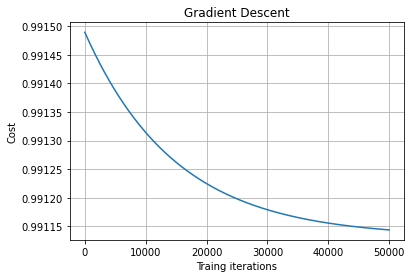

In [12]:

# định nghĩa số lần lặp
num_iterations = 50000

# định nghĩa learning rate
lr = 1e-2

# bây giờ chúng ta sẽ định nghĩa một list gọi là `loss` để lưu giá trị của hàm loss qua mỗi lần lặp
loss = []

theta = np.zeros(2)

for t in range(num_iterations):
    # tính gradients
    gradients = compute_gradients(data, theta)
    
    # update parameter
    theta = theta - (lr * gradients)
    
    loss.append(loss_function(data, theta))



plt.plot(loss)
plt.grid()
plt.xlabel('Traing iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()